SIGN LANGUAGE PREDICTION USING RANDOM FOREST

In [61]:
import pandas as pd       # For loading and handling CSV data
import numpy as np        # For numerical calculations
from sklearn.model_selection import train_test_split  # To split data
from sklearn.ensemble import RandomForestClassifier  # ML model
from sklearn.metrics import accuracy_score           # To check model performance
import matplotlib.pyplot as plt  # Optional: visualize images


In [62]:
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')


In [63]:
print(train_data.head())     # Look at first 5 rows
print(train_data.shape)      # Check dataset size

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

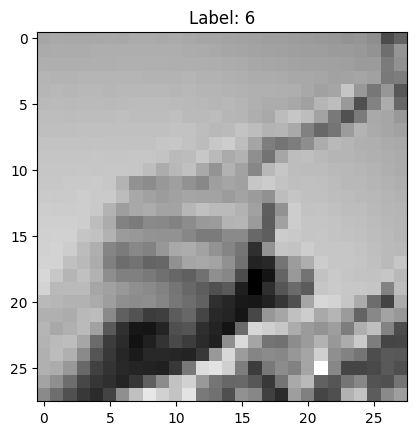

In [64]:
#iloc is for integer location
sample_image = train_data.drop('label', axis=1).iloc[1].values.reshape(28,28)
plt.imshow(sample_image, cmap='gray')
plt.title(f"Label: {train_data['label'].iloc[1]}")
plt.show()


In [65]:
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']


In [66]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)


In [67]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)


RandomForestClassifier(random_state=42)

In [68]:
y_pred = model.predict(X_val_split)
accuracy = accuracy_score(y_val_split, y_pred)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.9978146057184484


In [69]:
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.8008923591745678


Predicted Label: 6


c:\Users\lekhn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


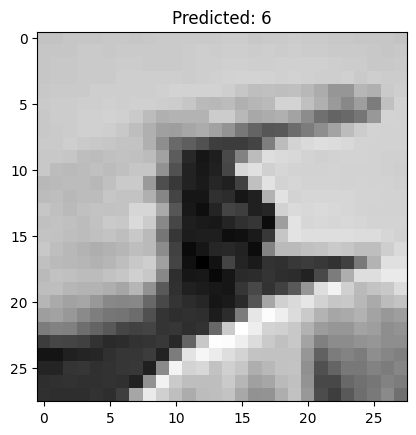

In [70]:
sample = X_test.iloc[0].values.reshape(1, -1)
pred = model.predict(sample)
print("Predicted Label:", pred[0])

plt.imshow(sample.reshape(28,28), cmap='gray')
plt.title(f"Predicted: {pred[0]}")
plt.show()


In [71]:
#ML model for saving the model
#import joblib

#joblib.dump(model, "sign_model.pkl")


In [72]:
#model = joblib.load("sign_model.pkl")


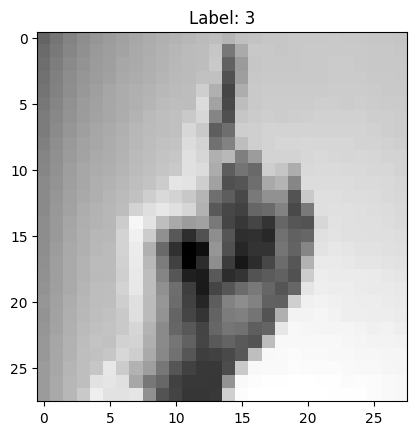

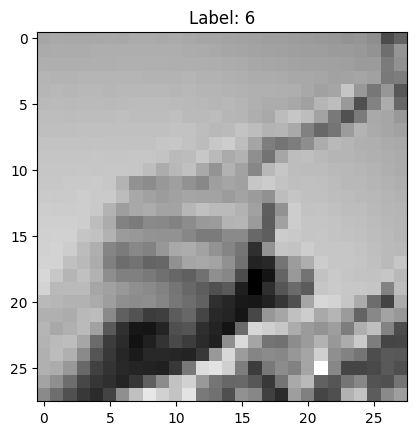

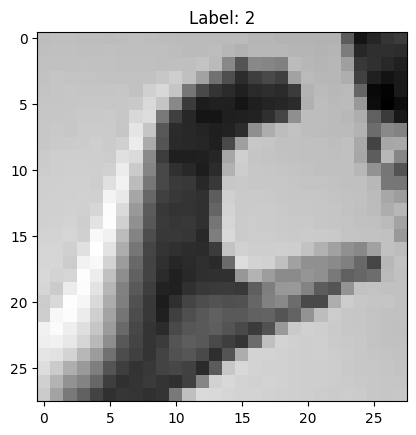

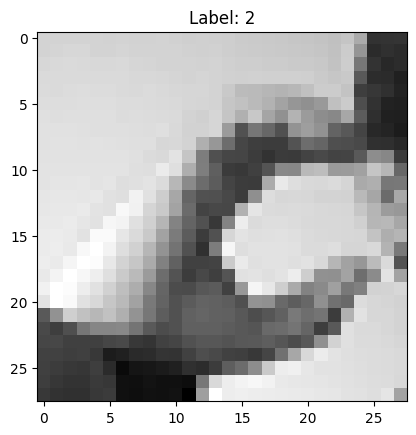

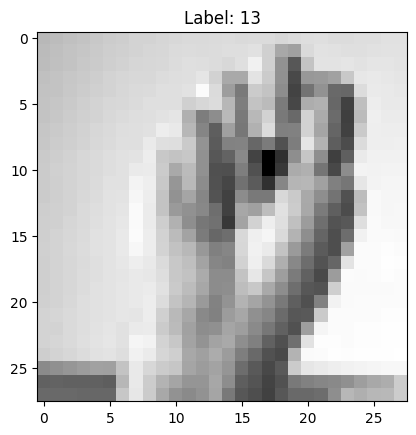

In [73]:
#sample images in gray scale
import matplotlib.pyplot as plt

for i in range(5):
    sample_image = X_train.iloc[i].values.reshape(28,28)
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"Label: {y_train.iloc[i]}")
    plt.show()


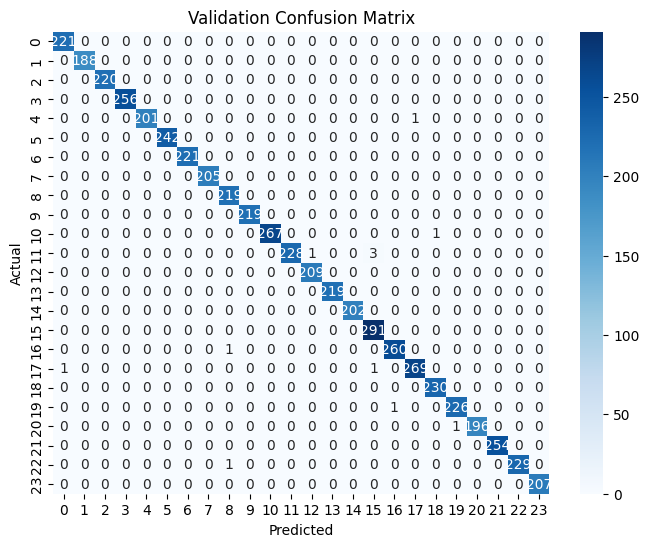

In [74]:
#CONFUSION MATRICS
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val_split, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


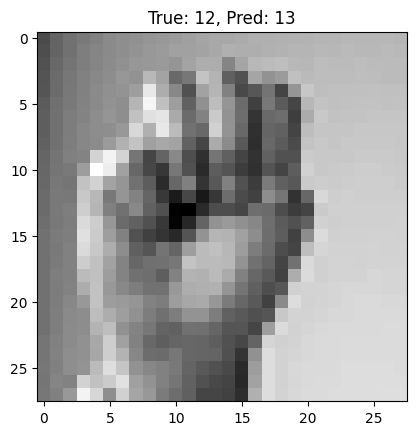

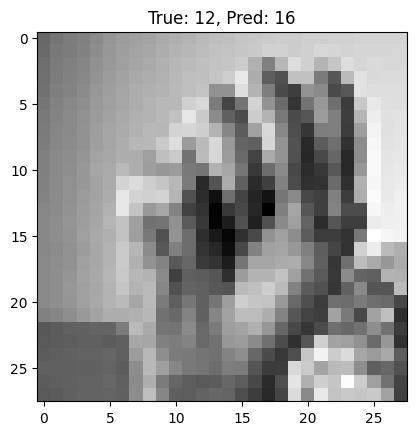

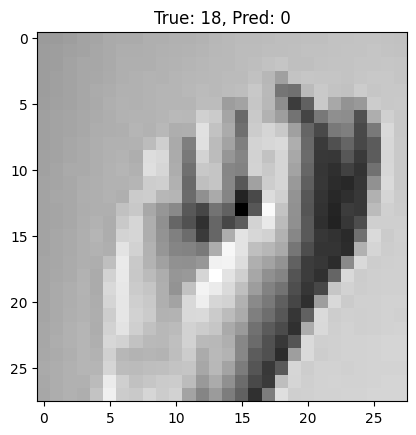

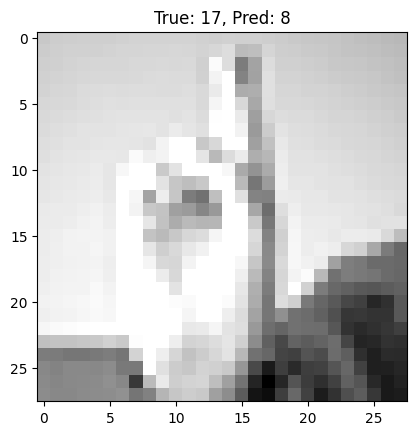

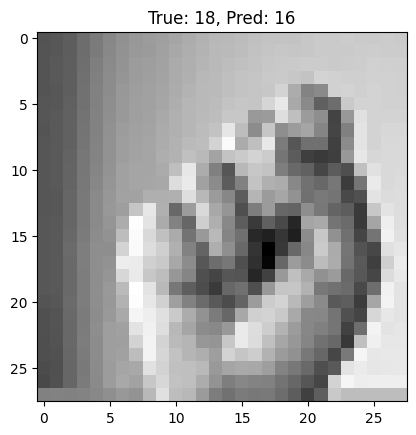

In [75]:
#misclassified images
import numpy as np

wrong_indices = np.where(y_val_split != y_pred)[0]

for i in wrong_indices[:5]:
    img = X_val_split.iloc[i].values.reshape(28,28)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y_val_split.iloc[i]}, Pred: {y_pred[i]}")
    plt.show()


In [ ]:
#comparison 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import time

models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=500)
}

results = []

for name, m in models.items():
    start = time.time()
    m.fit(X_train_split, y_train_split)
    y_p = m.predict(X_val_split)
    acc = accuracy_score(y_val_split, y_p)
    duration = time.time() - start
    results.append([name, acc, round(duration,2)])

import pandas as pd
comparison_df = pd.DataFrame(results, columns=["Model","Accuracy","Training Time"])
print(comparison_df)
